# INTRODUCTION
+ In this kernel, we will learn how to use plotly library.
    + Plotly library : Plotly's Python graphing library makes interactive, publication-quality graphs online. Examples of how to make line plots, scatter plots, area charts, bar charts, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.

Content:
1. [Loading Data and Explanation of Features](#1)
1. [Line Charts](#2)
1. [Scatter Charts](#3)
1. [Bar Charts](#4)
1. [Pie Charts](#5)
1. [Buble Charts](#6)
1. [Histogram](#7)
1. [Word Cloud](#8)
1. [Box Plot](#9)
1. [Scatter Plot Matrix](#10)
1. Map Plots : https://www.kaggle.com/kanncaa1/time-series-prediction-with-eda-of-world-war-2
1. Data Visualization
    1. Seaborn: https://www.kaggle.com/kanncaa1/seaborn-for-begginers
    1. Bokeh 1: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-1
    1. Bokeh 2: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-2
    1. Rare Visualization: https://www.kaggle.com/kanncaa1/rare-visualization-tools
1. [Insert Plots](#11)
1. [3D Scatter Plot with Colorscaling](#12)
1. [Multiple Subplots](#13)

In [29]:
import numpy as np
import pandas as pd

#plotly
import plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt


<a id=1 ><a>
        <br>
# Loading Data and Explanation of Features<br>
    
+ timesData includes 14 features that are:
    + world_rank
    + universty_name
    + country
    + teaching
    + international
    + research
    + citations
    + income
    + total_score
    + num_students
    + student_staff_ratio
    + international_students
    + female_male_ratio
    + year

In [2]:
# load data that we will use.
timesData = pd.read_csv("plotly_csv/timesData.csv")

In [3]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [4]:
timesData.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


<a id=2> <a> <br> 
# Line Charts
Line Charts Example: Citation and Teaching vs World Rank of Top 100 Universities

+ Import graph_objs as go
+ creating traces
    + x = x axis
    + y = y axis
    + mode = type of plot likemarker, line or line + markers
    + name = name of the plots
    + marker = marker used with dictionary.
        + clor = color of lines. It takes RGB(red,green,blue) and opacity(alpha)
    + text = the hover text (hover is curser)
+ data = is a list that we add traces into it
+ layout = it is dictionary
    + title = title of layout
    + x axis = it is dictionary
        + title = label of x axis
        + ticlen = length of x axis ticks
        + zeroline =  showing zero line or not
+ fig = it includes data and layout
+ iplot() = plots the figure(fig) that is created by data and layout

In [5]:
# prepare data frame
df = timesData.iloc[:100,:]
# creating trace1
trace1 = go.Scatter(x = df.world_rank, 
                    y= df.citations, 
                    mode = "lines", 
                    name = "citations", 
                    marker = dict(color="rgba(16,122,2,0.8)"),
                    text = df.university_name)
# creating trace2
trace2 = go.Scatter(x = df.world_rank, 
                    y = df.teaching, 
                    mode = "lines+markers", 
                    name = "teaching", 
                    marker = dict(color="rgba(50,20,50,0.8)"), 
                    text = df.university_name)

data = [trace1,trace2]
layout = dict(title = "Citation and Teaching vs World Rank of Top 100 Universities", 
              xaxis = dict(title = "World Rank", ticklen = 5, zeroline = False))
fig = dict(data=data,layout=layout)
iplot(fig)

<a id=3><a><br>
# Scatter Charts
Scatter Charts Example: Citation vs World Rank of Top 100 Universities with 2014,2015 and 2016

* Import graph_objs as go
* creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot likemarker, line or line + markers
    * name = name of the plots
    * marker = marker used with dictionary.
        * clor = color of lines. It takes RGB(red,green,blue) and opacity(alpha)
    * text = the hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary
    * title = title of layout
    * x axis = it is dictionary
        * title = label of x axis
        * ticlen = length of x axis ticks
        * zeroline =  showing zero line or not
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [6]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
# import graph objects as "go"
# creating trace1
trace1 = go.Scatter(x = df2014.world_rank, 
                    y = df2014.citations, 
                    mode = "markers", 
                    name = "2014", 
                    marker = dict(color="rgba(85, 28, 125, 0.8)"), 
                    text = df2014.university_name)
# creating trace2
trace2 = go.Scatter(x = df2015.world_rank, 
                    y = df2015.citations, 
                    mode = "markers", 
                    name = "2015", 
                    marker = dict(color="rgba(155, 28, 155, 0.8)"), 
                    text = df2015.university_name)
# creating trace3
trace3 = go.Scatter(x = df2016.world_rank, 
                    y = df2016.citations, 
                    mode = "markers", 
                    name = "2016", 
                    marker = dict(color="rgba(150, 128, 55, 0.8)"), 
                    text = df2016.university_name)

data = [trace1,trace2,trace3]
layout = dict(title = "Citation vs World Rank of Top 100 Universities with 2014-2015-2016", 
              xaxis = dict(title = "World Rank",ticklen = 5, zeroline = False), 
              yaxis = dict(title = "Citation", ticklen = 5, zeroline = False))
fig = dict(data = data, layout = layout)
iplot(fig)

<a id=4><a><br> 
# Bar Charts
First Bar Charts Example: citations and teaching of top 3 universites in 2014(style1)
* Import graph_objs as go
* creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot likemarker, line or line + markers
    * name = name of the plots
    * marker = marker used with dictionary.
        * clor = color of lines. It takes RGB(red,green,blue) and opacity(alpha)
    * text = the hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary
    * barmode = bar mode of bars like grouped
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [7]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as go
import plotly.graph_objects as go
# creating trace1
trace_1 = go.Bar(x = df2014.university_name, 
                 y = df2014.citations, 
                 name = "citations", 
                 marker = dict(color="rgba(177, 233, 33, 0.5)", 
                               line=dict(color="rgb(0,0,0)",width=1.5)), 
                 text = df2014.country)
                 
trace_2 = go.Bar(x = df2014.university_name, 
                 y = df2014.teaching, 
                 name = "teaching", 
                 marker = dict(color="rgba(255, 255, 123, 0.5)", line=dict(color="rgb(0,0,0)",width=1.5)), 
                 text = df2014.country)

data = [trace_1,trace_2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data=data, layout = layout)
iplot(fig)

First Bar Charts Example: citations and teaching of top 3 universites in 2014(style2)

Actually, if you change only the barmode from <i>group</i> to <i>relative</i> in previous example you achieve what did here. However, for diversity I use different syntaxes.
* Import graph_objs as go
* creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot likemarker, line or line + markers
    * name = name of the plots
    * marker = marker used with dictionary.
        * clor = color of lines. It takes RGB(red,green,blue) and opacity(alpha)
    * text = the hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary
    * xaxis = label of x axis
    * barmode = bar mode of bars like grouped(previous example) or relative
    * title = title of layout
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [8]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as go
import plotly.graph_objects as go
# creating trace1
x = df2014.university_name
trace1 = {
    "x" : x,
    "y" : df2014.citations,
    "name" : "citations",
    "type" : "bar"
};
trace2 = {
    "x" : x,
    "y" : df2014.teaching,
    "name" : "teaching",
    "type" : "bar"
};

data = [trace1,trace2];
layout = {
    "xaxis" : {"title": "Top 3 Universities"},
    "barmode": "relative",
    "title" : "citations and teaching of top 3 universities in 2014"
};

fig = go.Figure(data=data, layout = layout)
iplot(fig)

<a id=5><a><br>
# Pie Charts
+ fig: create figures
    + data : plot type
        + value : values of plot
        + labels : labels of plot
        + name : name of plots
        + hoverinfo : information in hover
        + hole : hole width
        + type : plot type like pie
    + layout : layout of plot
        + title : title of layout
        + annotations : font, showarrow, text, x, y

In [10]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [float(each.replace(",","."))for each in df2016.num_students]
labels = df2016.university_name
# figure
fig = {
    "data":[
        {
            "values": pie1_list,
            "labels": labels,
            "domain": {"x":[0,.5]},
            "name": "Number of Students Rates",
            "hoverinfo": "label+percent+name",
            "hole":.3,
            "type": "pie"
        },
    ],
    "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            {
                "font":{"size":20},
                "showarrow": False,
                "text": "Number of Students",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

<a id=6><a><br>
# Buble Charts
    
Buble Charts Example: University world rank(first20) vs teaching score with number of student(size) and intrentaional score(color) in 2016.
    
    + x = x axis
    + y = y axis
    + mode = marker properties
        + color = third dimension of plot. International score
        + size = third dimension of plot. Number of students
    + text = university names

In [23]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size = [float(each.replace(",",".")) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]
data = [
    {
        "y": df2016.teaching,
        "x": df2016.world_rank,
        "mode": "markers",
        "marker": {
            "color": international_color,
            "size": num_students_size,
            "showscale": True
        },
        "text": df2016.university_name
    }
]
layout = {
    "title":"University World Rank vs Teaching Score",
    "xaxis":{"title":"University"},
    "yaxis":{"title":"Teaching Score"}
}

fig = go.Figure(data=data,layout=layout)
iplot(fig)

<a id=7><a><br> 
# Histogram
Lets look at histogram of students-staff ratio in 2011 and 2012 years.

+ trace1 = first histogram
    + x = x axis
    + y = y axis
    + opacity = opacity of histogram
    + name = name of legend
    + marker = color of histogram
+ trace2 = second histogram
+ layout = layout
    + barmode = mode of histogram like overlay. Also you can change it with stack

In [28]:
# prepare data
x2011 = timesData.student_staff_ratio[timesData.year==2011]
x2012 = timesData.student_staff_ratio[timesData.year==2012]

trace1 = go.Histogram(
    x=x2011, 
    opacity=0.75, 
    name="2011", 
    marker=dict(color="rgba(171,50,95,0.6)"))
trace2 = go.Histogram(
    x=x2012, 
    opacity=0.75, 
    name="2012", 
    marker=dict(color="rgba(11,50,195,0.6)"))

data = [trace1,trace2]

layout = go.Layout(barmode="overlay", 
                   title="students-staff ratio in 2011 and 2012", 
                   xaxis=dict(title="students-staff ratio"), 
                   yaxis=dict(title="Count"))

fig = go.Figure(data=data,layout=layout)
iplot(fig)

<a id=8><a><br> 
# Word Cloud
Not a pyplot but learning it is good for visualization. Lets look at which country is mentioned most in 2011.
+ Wordcloud : word cloud library that I import at the beginning of kernel
    + background_color : color of back ground
    + generate : generates the country name list(x2011)  word cloud

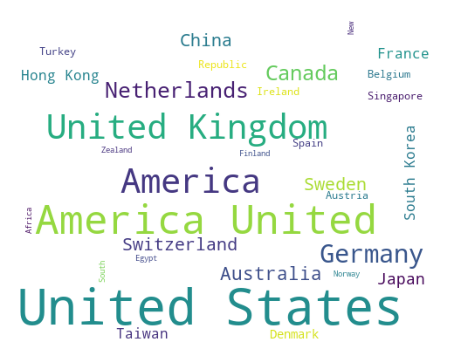

In [43]:
# data preparation
x2011 = timesData.country[timesData.year==2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color="white",width=512,height=384).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("graph.png")
plt.show()

<a id=9><a><br>
# Box Plot
+ Box Plots
    + Median (50th percentile) = middle value of the data set. Sort and take the data in the middle. It also called 50% percentile that is 50% of data are less that median (50th percentile)
        + 25th percentile = quartile 1 (Q1) that is lower qualtile
        + 75th percentile = quartile 3 (Q3) that is higher qualtile
        + heigh of box = IQR = interquartile range = Q3 - Q1
        + whiskers = 1.5 * IQR from the Q1 and Q3
        + Outliers = being more than 1.5 * IQR away from median commonly
+ trace = box
    + y = data we want to visualize with box plot
    + marker = color

In [42]:
# data preparation
x2015 = timesData[timesData.year == 2015]
trace0 = go.Box(
    y = x2015.research,
    name = "total score of universities in 2015",
    marker = dict(color="rgb(12,12,140)"))
trace1 = go.Box(
    y = x2015.total_score,
    name = "research of universities in 2015",
    marker = dict(color="rgb(12,123,123)"))

data = [trace0,trace1]
iplot(data)

<a id=10><a><br> 
# Scatter Plot Matrix
Scatter Matrix = it helps us to see convariance and relation between more than features
+ import figure factory as ff
+ create_scatterplotmatrix = creates sactter plot
    + data2015 = prepared data. It includes research, international and total scores with index from 1 to 401
    + colormap = color map of scatter plot
    + colormap_type = color type of scatter plot
    + height and weight

In [44]:
# import figure factory
import plotly.figure_factory as ff
# prepare data
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international","total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)
# sactter matrix
fig = ff.create_scatterplotmatrix(data2015, diag="box", index='index', colormap="Portland", 
                                  colormap_type="cat", height = 700, width = 700)
iplot(fig)

<a id=11><a><br>
# Insert Plots
Insert Plots Example : Teaching vs Income
    
Inset Matrix = 2 plots are in one frame

In [51]:
# first line plot
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching, 
    name= "teaching", 
    marker= dict(color="rgb(16,122,2,0.8)"))
# second line plot
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis="x2",
    yaxis="y2",
    name= "income", 
    marker= dict(color="rgb(163,12,25,0.8)"))
data = [trace1,trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6,0.95], 
        anchor="y2",
    ), 
    yaxis2=dict(
        domain=[0.6,0.95], 
        anchor="x2",
    ), title = "Income and Teaching vs World Rank of Universities")
fig = go.Figure(data=data,layout=layout)
iplot(fig)

<a id=12><a><br>
# 3D Scatter Plot with Colorscaling
3D Scatter: Sometimes 2D is not enough to understand data. The before adding one more dimension increase the intelligibility of the data. Even we will add color that is actually 4th dimension.
    
    + go.Scatter3d : create 3d scatter plot
    + x,y,z : axis of plots
    + mode : market that is scatter
    + size : marker size
    + color : axis of colorscale
    + colorscale : actually it 4th dimension

In [61]:
# create trace 1 that is 3d scatter

trace1 = go.Scatter3d(x=dataframe.world_rank, y=dataframe.research, z=dataframe.citations, 
                      mode='markers', marker=dict(size=9, color='rgb(222,222,22)'))
data=[trace1]
layout = go.Layout(
    margin=dict(
    l=0,
    r=0,
    b=0,
    t=0))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id=13><a><br>
# Multiple Subplots
Multiple Subplots : While comparing more one features, multiple subplots can be useful.

In [62]:
trace1 = go.Scatter(x=dataframe.world_rank, y=dataframe.research, name = "research")
trace2 = go.Scatter(x=dataframe.world_rank, y=dataframe.citations, xaxis="x2", yaxis="y2", name = "citations")
trace3 = go.Scatter(x=dataframe.world_rank, y=dataframe.income, xaxis="x3", yaxis="y3", name = "income")
trace4 = go.Scatter(x=dataframe.world_rank, y=dataframe.total_score, xaxis="x4", yaxis="y4", name = "total_score")
data = [trace1,trace2,trace3,trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)